In [ ]:
import graphviz
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
#하나의 데이터프레임 만들기 전 각 데이터 전처리
#원룸(연립주택, 다세대주택 eda)
filename = '/content/drive/MyDrive/Colab Notebooks/dml 자료/주택종류별+주택-+읍면동(연도+끝자리+0,5),+시군구(그+외+연도)_20230328224504.csv'
building = pd.read_csv(filename)
building.head(30)

,동별(1),동별(2),동별(3),2020,2020.1,2020.2,2020.3
0,동별(1),동별(2),동별(3),종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수
1,동별(1),동별(2),동별(3),연립주택,다세대주택,연립주택,다세대주택
2,서울시,영등포구,소계,1487,15474,1487,15474
3,서울시,영등포구,여의동,-,-,X,X
4,서울시,영등포구,당산1동,-,-,X,762
5,서울시,영등포구,당산2동,-,-,23,1219
6,서울시,영등포구,양평1동,-,-,45,445
7,서울시,영등포구,양평2동,-,-,155,1959
8,서울시,영등포구,신길1동,-,-,137,1246
9,서울시,영등포구,신길3동,-,-,X,391


In [ ]:
building1= building.drop(['동별(1)','동별(2)','2020', '2020.1'], axis=1)

In [ ]:
building2=building1.drop([0,1,2])

In [ ]:
building2
#x= 5개미만으로 개인정보보호를 위해 표시안함 평균인 3으로 대체

,동별(3),2020.2,2020.3
3,여의동,X,X
4,당산1동,X,762
5,당산2동,23,1219
6,양평1동,45,445
7,양평2동,155,1959
8,신길1동,137,1246
9,신길3동,X,391
10,신길4동,X,390
11,신길5동,146,718
12,신길6동,174,604


In [ ]:
building2.rename(columns = {'동별(3)':'Name','2020.2':'연립주택','2020.3':'다세대주택'},inplace=True)
building2

,Name,연립주택,다세대주택
3,여의동,X,X
4,당산1동,X,762
5,당산2동,23,1219
6,양평1동,45,445
7,양평2동,155,1959
8,신길1동,137,1246
9,신길3동,X,391
10,신길4동,X,390
11,신길5동,146,718
12,신길6동,174,604


In [ ]:
building3 = building2.replace('X',3)

In [ ]:
building3

,Name,연립주택,다세대주택
3,여의동,3,3
4,당산1동,3,762
5,당산2동,23,1219
6,양평1동,45,445
7,양평2동,155,1959
8,신길1동,137,1246
9,신길3동,3,391
10,신길4동,3,390
11,신길5동,146,718
12,신길6동,174,604


In [ ]:
building3.rename(columns = {'동별(3)':'Name','2020.2':'연립주택','2020.3':'다세대주택'},inplace=True)
building3

,Name,연립주택,다세대주택
3,여의동,3,3
4,당산1동,3,762
5,당산2동,23,1219
6,양평1동,45,445
7,양평2동,155,1959
8,신길1동,137,1246
9,신길3동,3,391
10,신길4동,3,390
11,신길5동,146,718
12,신길6동,174,604


In [ ]:
#견인 eda
filename = '/content/drive/MyDrive/Colab Notebooks/dml 자료/output.csv'
illegal = pd.read_csv(filename,encoding="cp949")
illegal.head(50)

,Unnamed: 0,번호,신고일,구정보,주소,유형,조치일,행정동
0,7,8,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15,영등포동
1,8,9,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15,여의동
2,10,11,2021-07-15,영등포구,서울특별시 영등포구 문래동6가 45-1,"횡단보도, 산책로 등",2021-07-15,문래동
3,11,12,2021-07-15,영등포구,서울특별시 영등포구 신길동 4877,"점자블록, 엘리베이터 입구",2021-07-15,신길7동
4,14,15,2021-07-15,영등포구,서울특별시 영등포구 신길동 4209,"횡단보도, 산책로 등",2021-07-15,신길6동
5,15,16,2021-07-15,영등포구,서울특별시 영등포구 여의도동 4-5,"점자블록, 엘리베이터 입구",2021-07-15,여의동
6,16,17,2021-07-15,영등포구,서울특별시 영등포구 여의도동 2-7,보도 중앙,2021-07-15,여의동
7,18,19,2021-07-15,영등포구,서울특별시 영등포구 여의도동 17-1,"버스정류장, 택시 승강장",2021-07-15,여의동
8,19,20,2021-07-15,영등포구,서울특별시 영등포구 여의도동 1-5,"버스정류장, 택시 승강장",2021-07-15,여의동
9,21,22,2021-07-15,영등포구,서울특별시 영등포구 신길동 205-270,보도와 차도가 구분된 도로의 차도,2021-07-15,신길4동


In [ ]:
#동별 개수 정리하기

In [ ]:
len(illegal.loc[illegal['행정동'] == '문래동'])
#각 개수 구해서 따로 데이터 프레임 만듬

628

In [ ]:
#인생네컷 동별 개수 구하기 + 포토이즘 개수 포함
filename = '/content/drive/MyDrive/Colab Notebooks/dml 자료/life4cut.csv'
photo = pd.read_csv(filename)
photo.head(30)

,도로명주소
0,서울특별시 은평구 진관3로 33
1,서울특별시 강서구 마곡중앙로 161-1
2,서울특별시 은평구 연서로29길 8
3,서울특별시 강서구 공항대로 261
4,서울특별시 강서구 강서로56길 17
5,서울특별시 강서구 화곡로25길 2
6,서울특별시 서대문구 거북골로 25-1
7,서울특별시 마포구 포은로 109-1
8,서울특별시 마포구 양화로23길 34
9,서울특별시 양천구 목동동로 339


In [ ]:
#pc
filename = '/content/drive/MyDrive/Colab Notebooks/dml 자료/hang.csv'
eda1 = pd.read_csv(filename)
eda1.head(50)

,상호명,상권업종소분류명,도로명주소,경도,위도,행정동
0,당인가피씨방,인터넷PC방,서울특별시 영등포구 디지털로37길 20,126.898325,37.490373,대림2동
1,스피드존PC방,인터넷PC방,서울특별시 영등포구 영중로8길 6,126.906160,37.518351,영등포동
2,린투피시존,인터넷PC방,서울특별시 영등포구 영신로9라길 16,126.905385,37.513352,영등포본동
3,자이PC방,인터넷PC방,서울특별시 영등포구 영중로4길 25,126.909054,37.517729,영등포동
4,행운PC,인터넷PC방,서울특별시 영등포구 영등포로37길 8,126.905535,37.520859,영등포동
5,지존PC,인터넷PC방,서울특별시 영등포구 영등포로 225,126.906635,37.519914,영등포동
6,anyPC119,인터넷PC방,서울특별시 영등포구 신길로 110,126.910459,37.501992,신길6동
7,쓰리팝,인터넷PC방,서울특별시 영등포구 여의대방로 89,126.916555,37.497290,신길6동
8,PC겜노리,인터넷PC방,서울특별시 영등포구 경인로 871,126.909418,37.517588,영등포동
9,엔피씨,인터넷PC방,서울특별시 영등포구 영등포로 109,126.894382,37.522341,당산1동


In [ ]:
eda1['행정동'].value_counts()

영등포동     14
대림2동      5
신길6동      5
양평1동      4
대림3동      3
영등포본동     2
당산1동      2
신길3동      2
문래동       1
당산2동      1
신길7동      1
양평2동      1
도림동       1
여의동       1
신길5동      1
신길1동      1
Name: 행정동, dtype: int64

In [ ]:
#최종파일
filename = '/content/drive/MyDrive/Colab Notebooks/dml 자료/최적입지 군집화 eda.csv'
eda = pd.read_csv(filename,encoding="cp949")
eda.head(50)

,Name,no,house,photo,pc
0,여의동,2031,6,1,1
1,당산1동,202,765,1,2
2,당산2동,299,1242,0,1
3,양평1동,271,490,0,4
4,양평2동,360,2114,0,1
5,신길1동,217,1383,0,1
6,신길3동,39,394,0,2
7,신길4동,45,393,0,0
8,신길5동,36,864,0,1
9,신길6동,179,778,0,5


In [ ]:
! pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
eda1 = eda.drop('Name',axis=1)

In [ ]:
eda1

,no,house,photo,pc
0,2031,6,1,1
1,202,765,1,2
2,299,1242,0,1
3,271,490,0,4
4,360,2114,0,1
5,217,1383,0,1
6,39,394,0,2
7,45,393,0,0
8,36,864,0,1
9,179,778,0,5


In [ ]:
eda1['house1']=eda1['house']*0.639
eda1['photo1']=eda1['photo']*0.243
eda1['pc1']=eda1['pc']*0.118


In [ ]:
eda1['20']=eda1['house1']+eda1['photo1']+eda1['pc1']

In [ ]:
eda1=eda1.drop(['house'],axis=1)
eda1=eda1.drop(['photo'],axis=1)
eda1=eda1.drop(['pc'],axis=1)

In [ ]:
eda1=eda1.drop(['house1','photo1','pc1'],axis=1)

In [ ]:
eda1

,no,20
0,2031,4.195
1,202,489.314
2,299,793.756
3,271,313.582
4,360,1350.964
5,217,883.855
6,39,252.002
7,45,251.127
8,36,552.214
9,179,497.732


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
df_minmax= MinMaxScaler.fit_transform(eda1)
eda2= pd.DataFrame(data=df_minmax,columns=eda1.columns)


In [ ]:
eda2

,no,20
0,1.000000,0.000000
1,0.083208,0.360210
2,0.131830,0.586263
3,0.117794,0.229725
4,0.162406,1.000000
5,0.090727,0.653163
6,0.001504,0.184001
7,0.004511,0.183351
8,0.000000,0.406914
9,0.071679,0.366460


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

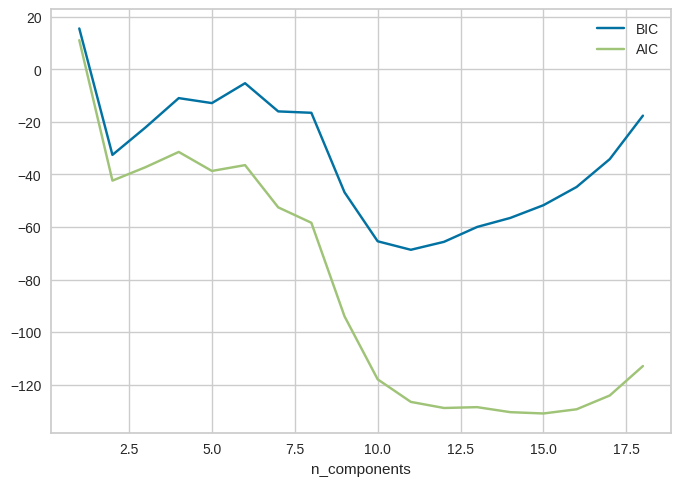

In [ ]:
n_components = np.arange(1, 19)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(eda2) for n in n_components]
plt.plot(n_components, [m.bic(eda2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(eda2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
n_components_range = range(1, 11)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(eda2)
    bic_scores.append(gmm.bic(eda2))

optimal_n_components = n_components_range[np.argmin(bic_scores)]

In [ ]:
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm.fit(eda2)

GaussianMixture(n_components=10, random_state=42)

In [ ]:
labels = gmm.predict(eda2)

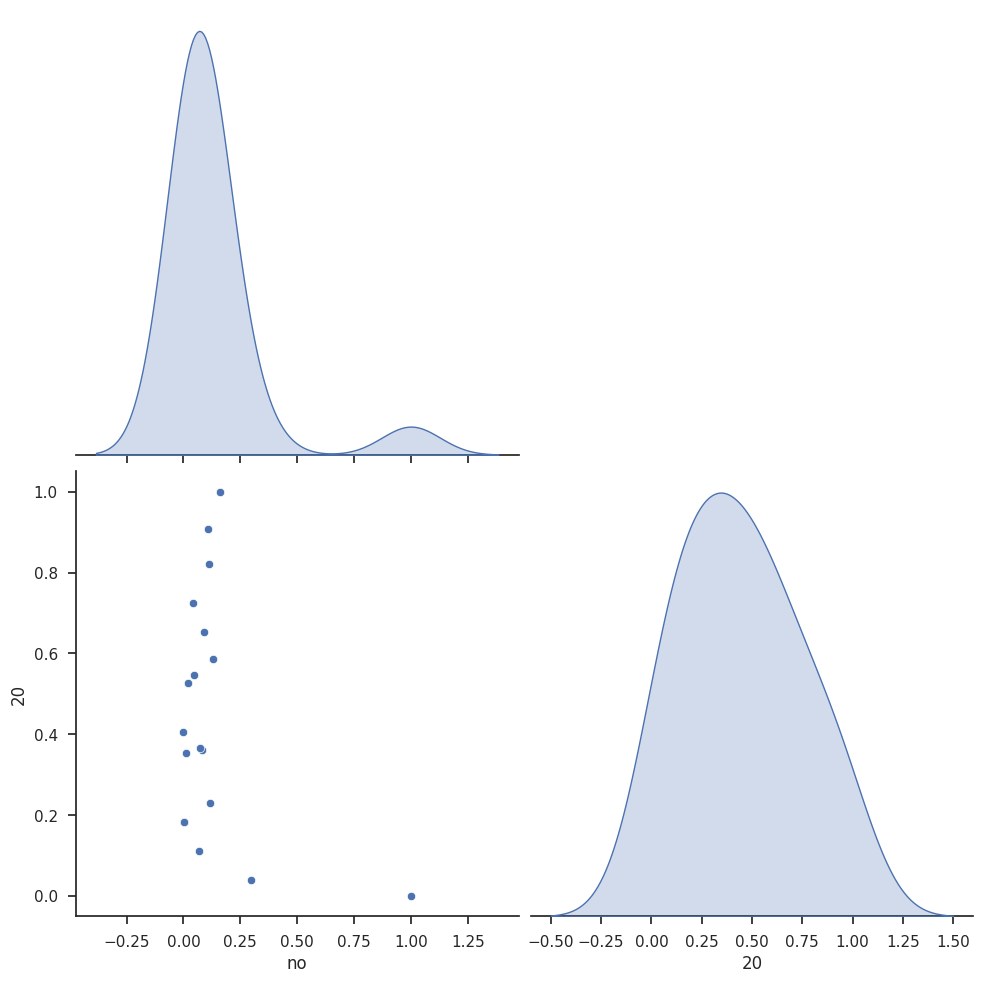

In [ ]:
sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(eda2,diag_kind='kde',corner=True,height=5)

In [ ]:
eda1['cluster1']=gmm.fit_predict(eda2)

In [ ]:
df_gmm= eda1.groupby(['cluster1']).agg({'no':'mean',
                                        '20':'mean'}).reset_index()
df_gmm['cnt']=eda1.groupby('cluster1')['no'].count()
df_gmm.head(10)

,cluster1,no,20,cnt
0,0,131.5,243.026500,4
1,1,168.0,931.519500,2
2,2,2031.0,4.195000,1
3,3,190.5,493.523000,2
4,4,628.0,58.996000,1
5,5,169.0,749.183333,3
6,6,360.0,1350.964000,1
7,7,255.0,1169.338000,2
8,8,46.5,515.732000,2


In [ ]:
eda1

,no,20,cluster1
0,2031,4.195,2
1,202,489.314,3
2,299,793.756,5
3,271,313.582,0
4,360,1350.964,6
5,217,883.855,1
6,39,252.002,0
7,45,251.127,0
8,36,552.214,8
9,179,497.732,3
